---

# Forecasts and Predictions

## Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

You should:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

In [1]:
import math
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
warnings.filterwarnings ("ignore")

%matplotlib inline


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [3]:
local_path = '/Users/yoni/Pictures/jupyter/Forecast and prediction/gym_churn_us.csv'
gym_data = pd.read_csv(local_path)

## Table Of Contents

* [EDA](#chapter1)
* [Build a model to predict user churn](#chapter2)
* [Creat User Clusters](#chapter3)
* [Conclutions](#chapter4)




## EDA
<a class="anchor" id="chapter1"></a>

In [4]:
gym_data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [5]:
gym_data.tail(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3990,1,0,1,0,1,12,0,33,31.771147,8.0,10,1.831577,1.924509,0
3991,1,0,1,0,1,6,0,33,69.301270,6.0,1,1.367289,1.435721,0
3992,0,1,1,1,1,12,0,31,223.102448,8.0,4,3.855916,3.797062,0
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
gym_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

We can already see that we have no categorical data we need to worrie about.
And we dont have any missing values

In [7]:
gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


From this table we can learn a lot already
- Most of the users are living or working close to the gym
- A bit less than half of users are employees of A partner company
- Around 30% of users signed up throgh the "bring a friend" offer
- The average use spends an extra 147 Dollars a month on top of the membership
- The average user comes to the gym around twice a week
- The last month we can see a small decline in the frequency that users come to the gym
- 26.5% of users left last month
- About outliers, we can see that we have them in the 'Age', 'Lifetime' and 'Avg_class_frequency' (total and current month) 

In [8]:
#  I'll Change the column names to lowercase
gym_data.columns= gym_data.columns.str.lower()

In [9]:
gym_data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


At this poin i will look at the difference between the users that let and the ones that satyed with us

In [10]:
gym_data.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


There is a clear picture that is painted from this table, we can already see a clear difference between users that left and thous that stayed.
and we can hypothesis what metrics are better at predicting the Churn.
Users that left:
- less of them live or work close by the gym
- More likely to not sign on with the "bring a friend" offer
- Less likely to be apart of a partner company 
- Had a shorter contract period
- On average go to less group sessions
- Are usually A bit younger 
- Spent less money on top of their membership
- Their contract is around a month and a half from ending
- They are relativly new to the gym
- They visit the gym less frequently 
- Their visits to the gym declined a bit in the last month

All this makes a lot of sense and is probably not earth shattering information. But it is good to see that the data backs up the logical conclutions and is a goodindicator that we are working with quality real world data. 

In [11]:
# I will devide the data to users that stayed and those that left
gym_stayed = gym_data[gym_data['churn']== 0] #users that stayed 
gym_churn = gym_data[gym_data['churn']== 1]  #users that left

In [12]:
gym_stayed.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [13]:
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


At this point i will plot histograms for both groups to see the distribution of the data in each of them.

In [14]:
def plot (data_1, data_2, column):
    if len(data_1[column].unique())>2:
        plt.hist(data_1[column],bins=12)
        plt.hist(data_2[column],bins=12)
        plt.title('{}'.format(column),fontdict={'size':15})
        plt.xlabel(column)
        plt.legend(labels=['Stayed', 'Left'])
        
    else:
        plt.hist(data_1[column],bins=2,ec='k')
        plt.hist(data_2[column],bins=2,ec='k')
        plt.title('{}'.format(column),fontdict={'size':15})
        plt.xticks((0,1))
        plt.xlabel(column)
        plt.legend(labels=['Stayed', 'Left'])

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

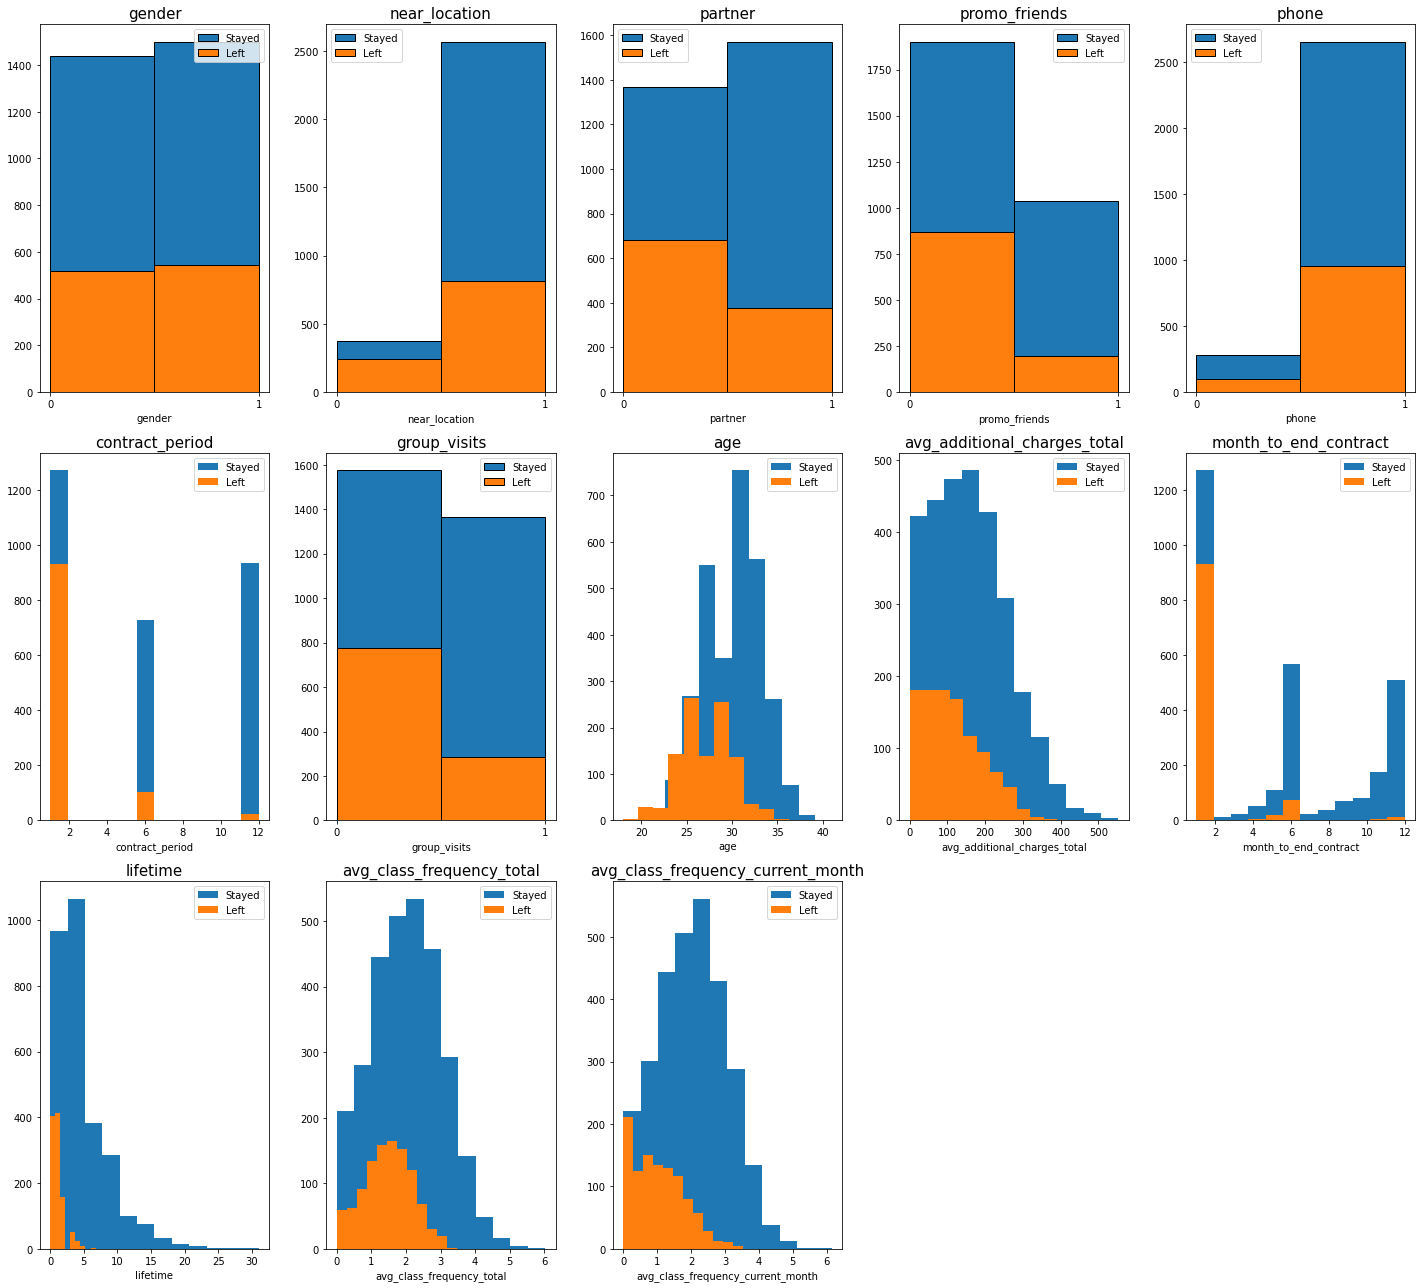

In [16]:
fig = plt.figure(figsize=(20,18))

gs1 = gridspec.GridSpec(3, 5)

axs = []
for i, num in zip(gym_stayed.drop(['churn'],axis=1).columns, range(1,15)):
    axs.append(fig.add_subplot(gs1[num - 1]))
    plot(gym_stayed,gym_churn,i)
    plt.title(i,fontdict={'size':15})
    
plt.tight_layout()

plt.show()

All these graphs paint the same picture we have only in greater detail.
The main bit of extra information we can see is that there is a stronger trend for users that left to come less in their last month then they did before and most of the users that left had a short contract abd it was about to be finished.

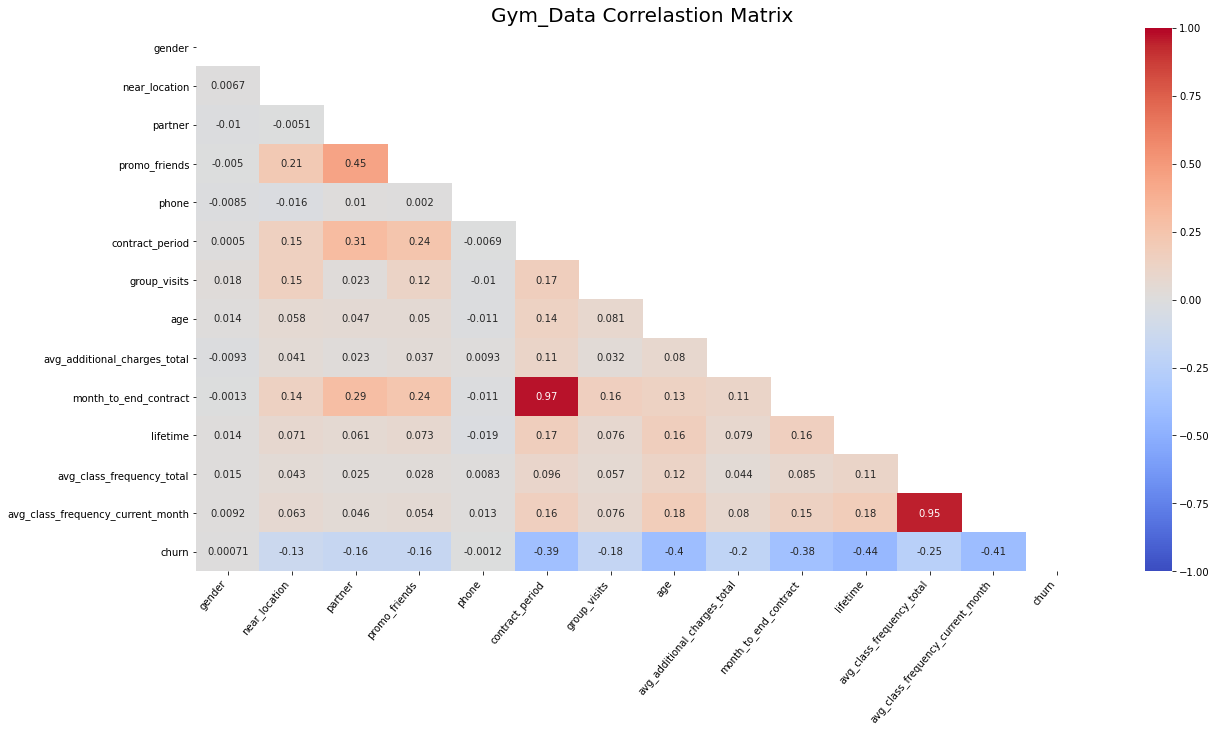

In [17]:
# Creating a correlation matrix


gym_corr = gym_data.corr()

mask = np.zeros(gym_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(20,10))
sns.heatmap(gym_corr, annot=True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm',mask = mask)
plt.xticks(rotation = 50,ha='right')
plt.title('Gym_Data Correlastion Matrix',fontdict={'size':20})
plt.show()

From this graph we can learn that the features that most correlate with churn are 'Avg_class_frequency_current_month', 'lifetime', 'age', 'contract_period' and 'month_to_end_contract'.

We also have features that correlate to each other and they are:

'avg_class_frequency_current_month' and 'Avg_class_frequency_total'

'month_to_end_contract' and 'contract_period'


## Build a model to predict user churn
<a class="anchor" id="chapter2"></a>

First thing before i start to build models i will get rid of some of the columns that are irrelevant like 'gender' and 'phone'

In [18]:
gym_model = gym_data.drop(['gender','phone'],axis = 1)
gym_model.head()

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,1,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [19]:
# building a function to print out the models metrics

def print_all_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))


Now for the logistic regression i will get rid of the columns that are correlated with each other to evoid multicollinearity.

There are two pairs of columns that have a high correlation for each pair ill keep the one with the higher correlation to the target feature 'churn'. The column pairs are:
- month_to_end_contract / contract_period
- avg_class_frequency_total / avg_class_frequency_current_month

In the first i will keep 'contract_period' and in the second i will keep 'avg_class_frequency_current_month'.

In [20]:
gym_model_log_reg = gym_model.drop(['month_to_end_contract','avg_class_frequency_total'],axis = 1)

In [39]:
# divide the data into features (the X matrix) and a target variable (y)

X = gym_model_log_reg.drop('churn', axis = 1)
y = gym_model_log_reg['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

# Create scaler object and apply it to train set
scaler = StandardScaler()

# Train scaler and transform the matric for train set
X_train_st = scaler.fit_transform(X_train)

# apply standardization of feature matric for test set
X_test_st = scaler.transform(X_test)

In [40]:
# First we will start with the logistic regression model

model = LogisticRegression() 

model.fit(X_train_st,y_train)

# make forecasts
log_predictions = model.predict(X_test_st) 
log_probabilities = model.predict_proba(X_test_st)[:,1]

In [41]:
# Building a confusion matrix just to get an idea of how good the model does

cm = confusion_matrix(y_test,log_predictions)
tn, fp, fn, tp = cm.ravel() 
cm

array([[563,  25],
       [ 43, 169]])

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Well done! You can improve this confusion matrix part:<br>
            <a>https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62</a><br>
            <a>https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea</a>
</div>

In [24]:
acc = accuracy_score(y_test, log_predictions) 

In [25]:
print('Accuracy score for logistic regression: {}'.format(acc))

Accuracy score for logistic regression: 0.90875


In [26]:
print_all_metrics(y_test,log_predictions,title= 'Logistic Regression')

Logistic Regression
	Accuracy: 0.91
	Precision: 0.86
	Recall: 0.78
	F1: 0.82


Now I will build the random forest model and test it to see which one of the models is better for us.

In [42]:
X_rand_forest = gym_model.drop('churn', axis = 1)
y_rand_forest = gym_model['churn']

X_train, X_test, y_train, y_test = train_test_split(X_rand_forest, y_rand_forest, test_size=0.2, random_state=1)

rf_model = RandomForestClassifier(n_estimators = 100,random_state=0)

rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test) # write your code here
rf_probabilities = rf_model.predict_proba(X_test)[:,1] # write your code here


In [43]:
print_all_metrics(y_test,rf_predictions,title= 'Random Forest')

Random Forest
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.84
	F1: 0.87


Both models are close to each other but the random forest did a bit better (for uor case the difference between Precision and Recall is not so important and the F1 score is higher with the random forest) so our model for this task will be the Random Forest

## Creat User Clusters
<a class="anchor" id="chapter3"></a>

First we will plot a dendrogram

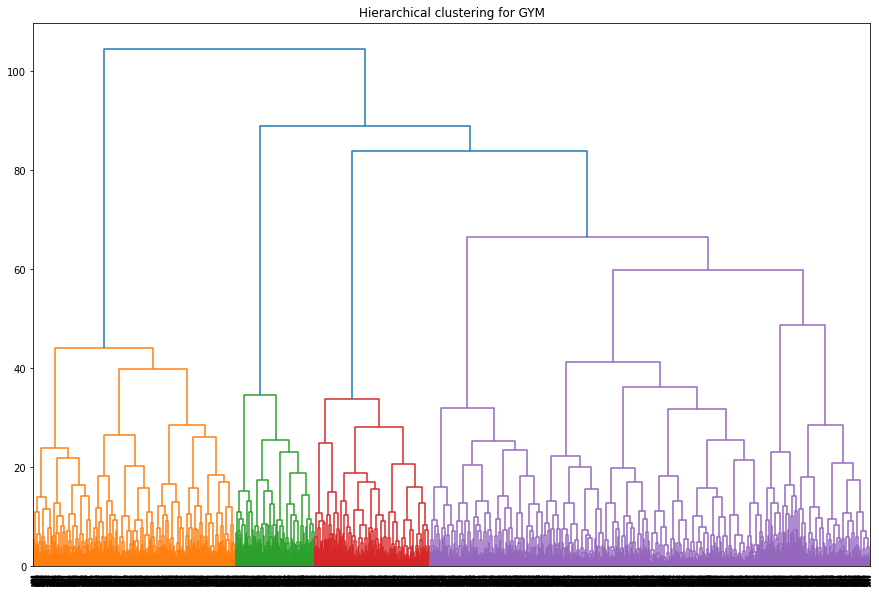

In [29]:
X_cluster = gym_data.drop('churn', axis = 1)

# Standrdize the data

sc = StandardScaler()
x_sc = sc.fit_transform(X_cluster)


linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

Now we will train the k-means clustering model

In [30]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)

gym_data['cluster_km'] = labels

gym_data.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.501980,0.959406,0.783168,0.574257,1.000000,10.895050,0.541584,29.974257,160.843413,9.956436,4.720792,1.984038,1.976872,0.027723
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.561091,0.976275,0.355872,0.231317,0.998814,2.652432,0.476868,30.117438,161.202364,2.448399,4.933571,2.843964,2.841957,0.067616
4,0.485282,1.000000,0.350835,0.239459,1.000000,1.952267,0.339698,28.171838,131.742030,1.859984,2.420048,1.245049,1.009504,0.516309


The first thing that jumps to mind when looking at the means of data grouped by the cluster is that there are extreme groups. For example in cluster 0 nuser gave their phone, this is extreme when we saw in the beginning that 90% of users gave their phone number. Another example is in the 'partner' column cluster 2 have no users that work in a partner company while in cluster 1 all the users work in a partner company, this can be said about many of the columns and their represintation in each of the clusters.

At this stage i will plot graphs for some features of each cluster 

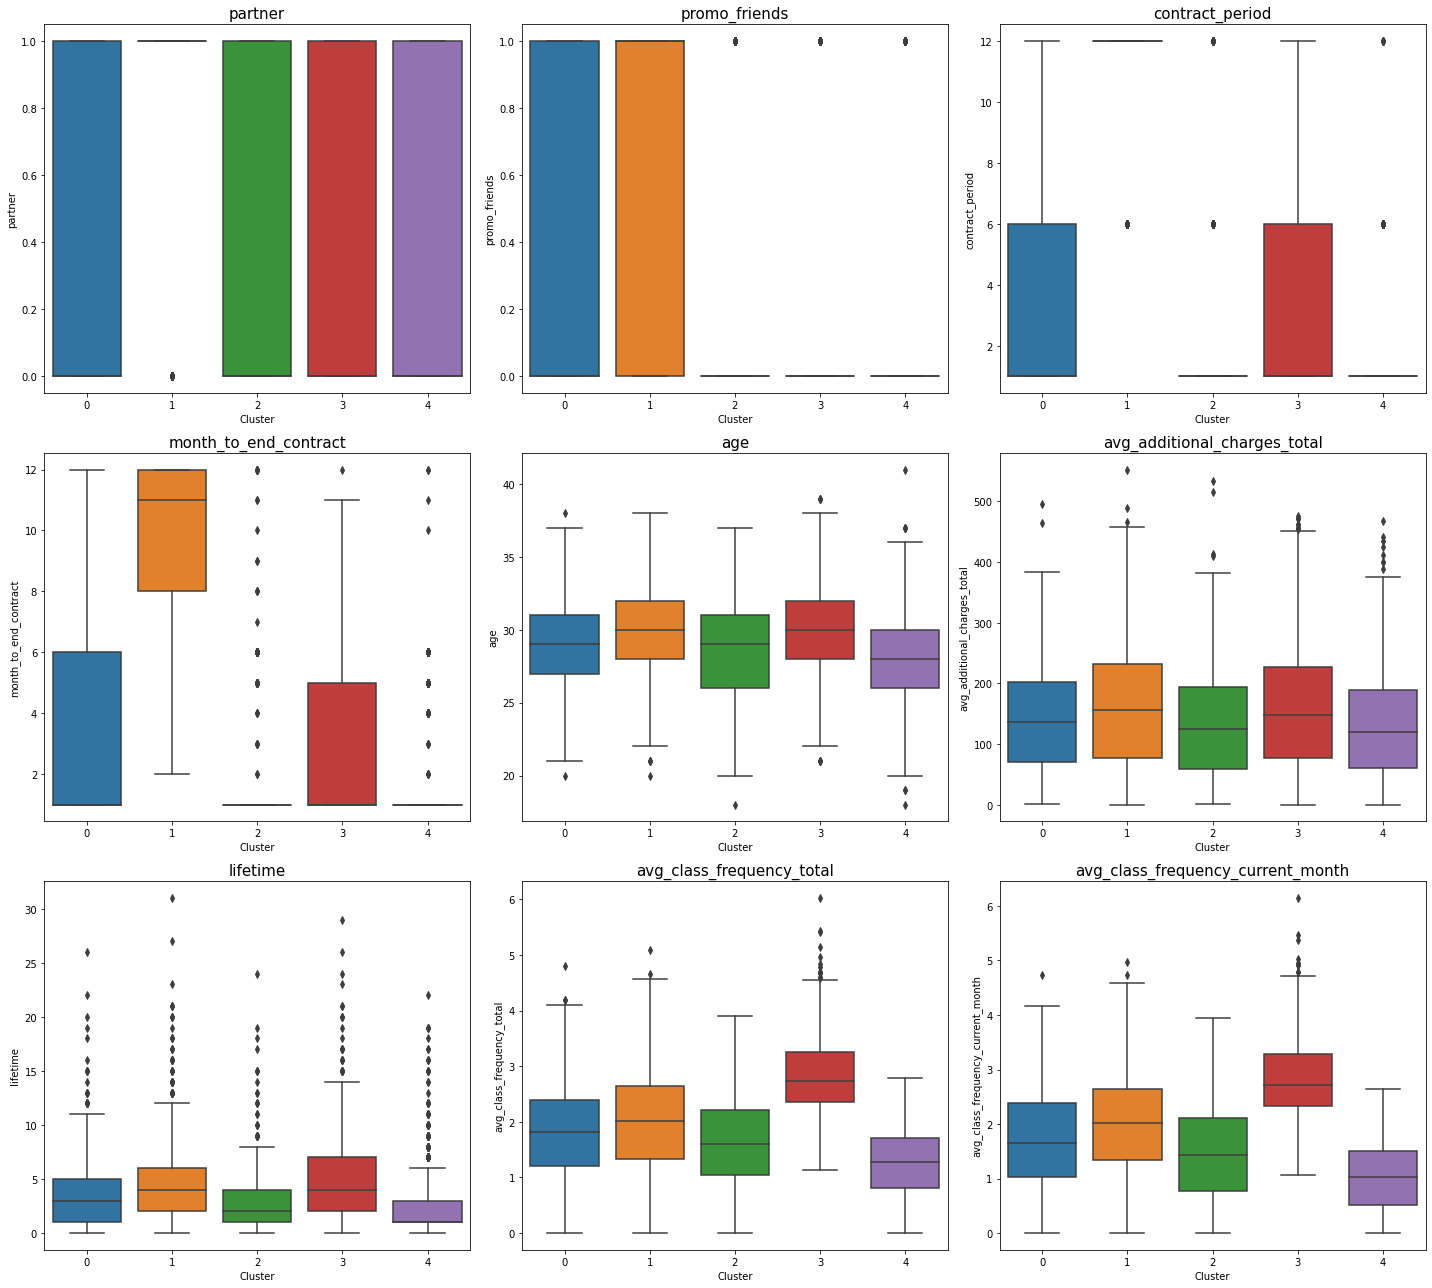

In [31]:
# chosen features to plot
features= ['partner','promo_friends','contract_period','month_to_end_contract','age','avg_additional_charges_total','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']


fig = plt.figure(figsize=(20,18))

gs1 = gridspec.GridSpec(3, 3)

axs = []
for c, num in zip(features, range(1,10)):
    axs.append(fig.add_subplot(gs1[num - 1]))
    ax = sns.boxplot(x="cluster_km", y=c, data=gym_data)
    plt.xlabel('Cluster')
    plt.title(c,fontdict={'size':15})
    
plt.tight_layout()

plt.show()

In these box plots above we have a visual represintation of the conclution that we had about the clusters. We can see that each cluster is extreame in a different feature and if not extreame then pronounced for sure. 

We can see that for the 'avg_class_frequency_current_month' cluster 4 is in the lead and cluster 2 has most of the low numbers. for 'partner' we see that cluster 0 and 4 have a mix but the rest are almost totally comprized of users that are a member of a partner company or not with the rare outlier.

In [32]:
# Calculating the churn for each cluster 

gym_data.groupby(['cluster_km'])['churn'].mean()    

cluster_km
0    0.267532
1    0.027723
2    0.443564
3    0.067616
4    0.516309
Name: churn, dtype: float64

We can see that we have clear differences in the churn of the clusters
cluster 3 has the lowest churn rate (2.3%) with cluster 4 behind it (4.6%).
In the high churn we have cluster 2 with more than 55% churn and behind it cluster 1

## Conclutions
<a class="anchor" id="chapter4"></a>

After we looked at the data and devided the users into clusters we can can say with confidence that there are a couple of metrict that are telling whether a user is going to stay in the gym of not.
loyal users tent to have long contract periods and have more weekly visits to the gym. the longer the lifetime of a user the less likly they are to leave.
The red lights should light up when the average class frequency in the last month went down the users contract was short and is about to end and they are not getting any of the special friend or partner discouts.

I would say that the most loyal custemers are
users that are on  the partner discount came through a friend has a long contract priod spends more additional money at the gym  tends to be older and cones to the gym more then average.

The most unloyal costumer is younger didnt sign on for long and isnt getting any discount.

Some reccomendations for keeping more of the users will be:

- Putting an emphasis and special sales for long contracts (especialy for new users that need to renew the contract for the first time
- Finding users that are comming less this month then they used to and tageting them with special offers or giving them positive feedback and pushing them to come more
- Intreducing a tier system and the more classes you come to the more you spend and the longer you are a member the more discounts in the shops and in the contracts you can get
- Pushing the younger users to come more to group sessions the more they know the people around the less likely they are to leave